Google Play Store Apps Data Analysis

INTRODUCTION

The Google Play Store dataset is a rich source of information on Android applications, capturing essential details such as app names, categories, ratings, reviews, and install counts. This data provides a comprehensive overview of the app ecosystem, allowing for in-depth analysis of app performance and user engagement. By exploring these elements, analysts can uncover trends, assess user satisfaction, and evaluate market dynamics, offering valuable insights into the world of mobile applications.

Purpose of this project

This analysis seeks to uncover customer preferences by examining the interplay between app pricing, user reviews, and ratings, ultimately assisting
developers in boosting their app's popularity.

Dataset

This dataset is taken from kaggle - https://www.kaggle.com/datasets/utshabkumarghosh/android-app-market-on-google-play

Files

apps.csv: Includes fundamental app details such as categories,installs and ratings etc.
user _reviews.csv: Contains user reviews and their associated sentiment polarity for each category.

Exploratory Questions

1)Top Categories:
What are the top app categories based on the number of installs and reviews?

2)App Type Distribution:
Are the majority of apps paid or free, and how does this distribution affect their ratings and reviews?

3)Importance of Ratings:
How do app ratings impact the number of installs and reviews?

4)Reviews and Ratings Correlation:
What is the relationship between the number of reviews and app ratings?

5)Update Distribution:
How are app updates distributed throughout the year?

6)Apps size:
How does the app size impact ratings?

7)Sentiment Analysis:
How does sentiment polarity vary between paid and free apps?

8)Sentiment Proportions:
What percentage of reviews fall into different sentiment categories (positive, neutral, negative)?



importing libraries and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
apps_data=pd.read_csv('apps.csv')
reviews_data=pd.read_csv('user_reviews.csv')

In [3]:
apps_data.head(10)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
reviews_data.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [5]:
apps_data.shape

(9659, 14)

In [6]:
reviews_data.shape

(64295, 5)

There are  9659 rows and 14 columns, 64295 rows and 5 columns in apps_data,reviews_data dataset respectively

1)Data Preparation - Data Cleaning

In [7]:
#Drop the first Column
apps_data = apps_data.iloc[:, 1:]
apps_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
apps_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [9]:
#Remove + symbol from installs
apps_data['Installs'] = apps_data['Installs'].replace('[\+,]', '', regex=True).astype(int)


In [10]:
apps_data.duplicated().any()
apps_data.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [11]:
apps_data.nunique()

App               9659
Category            33
Rating              39
Reviews           5330
Size               191
Installs            20
Type                 2
Price               92
Content Rating       6
Genres             118
Last Updated      1377
Current Ver       2769
Android Ver         33
dtype: int64

In [12]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int32  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(9)
memory usage: 943.4+ KB


In [13]:
reviews_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [14]:
#Correcting the datatypes
apps_data['Installs'] = pd.to_numeric(apps_data['Installs'], errors='coerce')
apps_data['Price'] = pd.to_numeric(apps_data['Price'], errors='coerce')
apps_data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Exploratory Data Analysis and Visualization

2)Category exploration

In [15]:
1)What are the top app categories based on the number of installs and ratings?

Object `ratings` not found.


Number of Categories:
33

App Distribution Across Categories:
Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name:

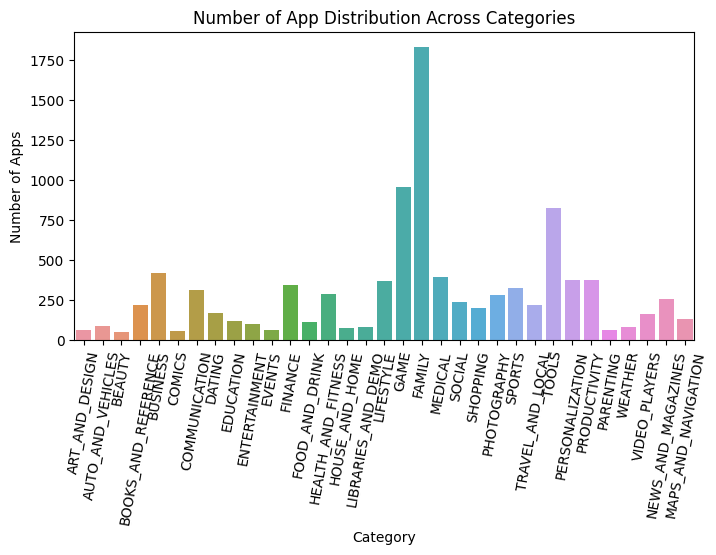

In [16]:
# Investigate app distribution across categories
category_distribution = apps_data['Category'].value_counts()
print("Number of Categories:")
print(apps_data["Category"].nunique())
print("\nApp Distribution Across Categories:")
print(category_distribution)

# Plot the distribution

plt.figure(figsize=(8, 4))
sns.countplot(x='Category', data=apps_data)
plt.title('Number of App Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=80)
plt.show()

The top 5 categories with the highest number of apps are Family, Games, Tools, Business and medical.
Let's explore top app categories based on the number of installs and ratings

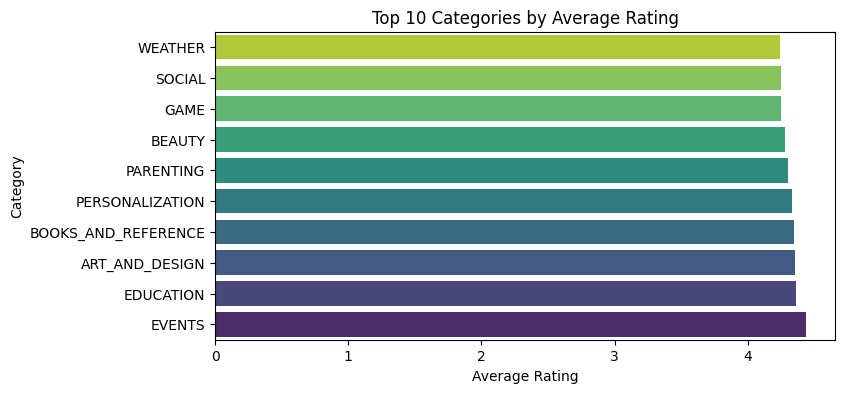

In [17]:
# Group by 'Category' and calculate the mean rating
category_summary = apps_data.groupby('Category').agg({
    'Rating': 'mean'
}).reset_index()

# Sort by 'Rating' in descending order and select the top 10 categories
category_summary_sorted = category_summary.sort_values(by='Rating', ascending=False).head(10)

# Plot using seaborn
plt.figure(figsize=(8, 4))
sns.barplot(
    data=category_summary_sorted,
    y='Category',
    x='Rating',
    palette='viridis'
)
plt.xlabel('Average Rating')
plt.title('Top 10 Categories by Average Rating')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top
plt.show()


              Category     Installs
21  NEWS_AND_MAGAZINES   2369217760
30    TRAVEL_AND_LOCAL   2894887146
31       VIDEO_PLAYERS   3926902720
11              FAMILY   4427941505
24         PHOTOGRAPHY   4649147655
27              SOCIAL   5487867902
25        PRODUCTIVITY   5793091369
29               TOOLS   8001771915
6        COMMUNICATION  11038276251
14                GAME  13878924415


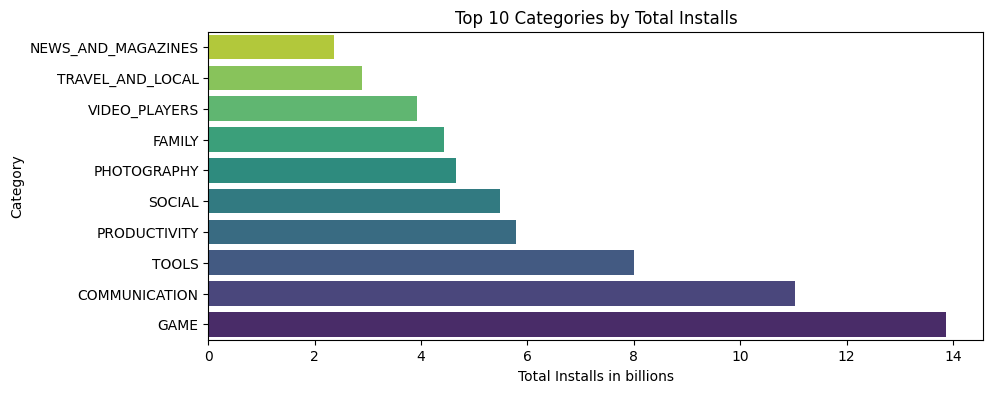

In [18]:
apps_data['Installs'] = apps_data['Installs'].astype(int)
# Group by 'Category' and aggregate total installs
category_summary = apps_data.groupby('Category').agg({
    'Installs': 'sum'
}).reset_index()
print(category_summary.sort_values(by='Installs').tail(10))

category_summary['Installs(Billions)'] = category_summary['Installs'] / 1_000_000_000
# Sort by 'Installs' in descending order and select the top 10 categories
category_summary_sorted = category_summary.sort_values(by='Installs(Billions)', ascending=False).head(10)

# Plot using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(
    data=category_summary_sorted,
    y='Category',
    x='Installs(Billions)',
    palette='viridis'
)
plt.xlabel('Total Installs in billions')
plt.title('Top 10 Categories by Total Installs')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top
plt.show()

In [19]:
2) Are the majority of apps paid or free, and how does this distribution affect their ratings and reviews?

Object `reviews` not found.


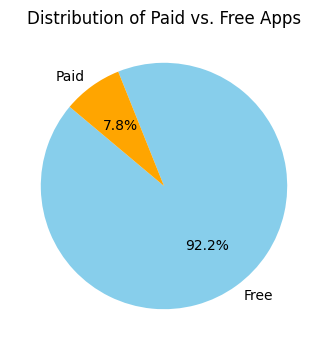

Type
Free    4.166372
Paid    4.259603
Name: Rating, dtype: float64
Type
Free    234243.688532
Paid      8724.887566
Name: Reviews, dtype: float64


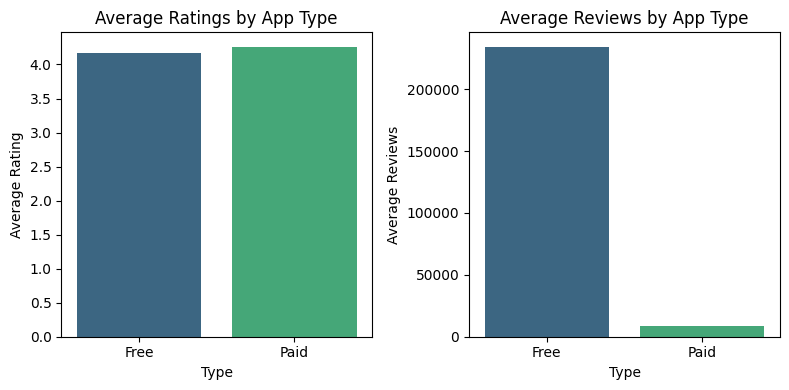

In [20]:
type_counts = apps_data['Type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Distribution of Paid vs. Free Apps')
plt.show()

# Calculate mean ratings and reviews for paid vs. free apps
mean_ratings = apps_data.groupby('Type')['Rating'].mean()
mean_reviews = apps_data.groupby('Type')['Reviews'].mean()

# Plot ratings and reviews
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Ratings plot
sns.barplot(x=mean_ratings.index, y=mean_ratings.values, palette='viridis', ax=axes[0])
axes[0].set_title('Average Ratings by App Type')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Average Rating')

print(mean_ratings)
# Reviews plot
sns.barplot(x=mean_reviews.index, y=mean_reviews.values, palette='viridis', ax=axes[1])
axes[1].set_title('Average Reviews by App Type')
axes[1].set_xlabel('Type')
axes[1].set_ylabel('Average Reviews')

print(mean_reviews)
plt.tight_layout()
plt.show()

The majority of apps are free, with a slight difference in ratings between paid and free apps. 
However, there is a significant disparity in the number of reviews, with free apps receiving an average of 234,243.69 reviews
compared to just 8,724.89 reviews for paid apps.

In [21]:
3)How do app ratings impact the number of installs and reviews?

Object `reviews` not found.


Average Rating: 4.17


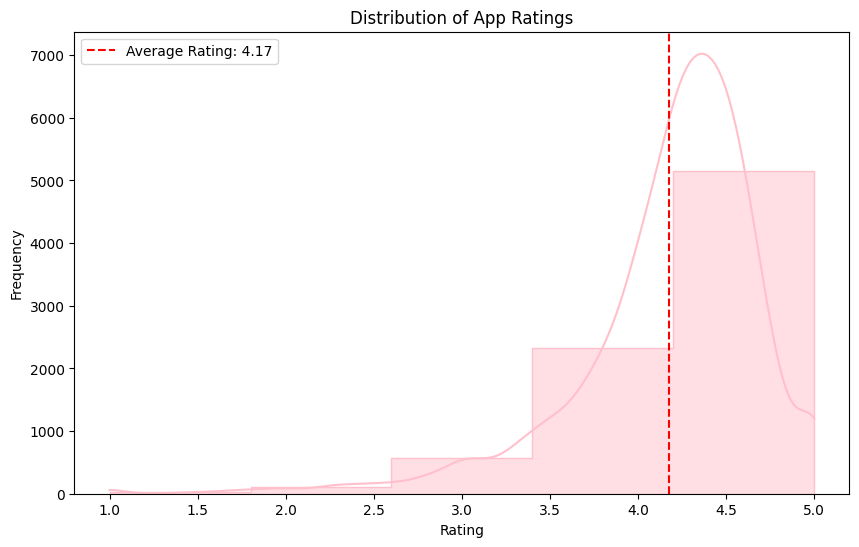

In [22]:
average_rating = apps_data['Rating'].mean()
print(f"Average Rating: {average_rating:.2f}")

# Plot histogram 
plt.figure(figsize=(10, 6))
sns.histplot(apps_data['Rating'], bins=5, kde=True, color='pink', element='step')

# Plot average rating line
plt.axvline(average_rating, color='red', linestyle='--', label=f'Average Rating: {average_rating:.2f}')

# Add titles and labels
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

Average rating for apps are 4.17

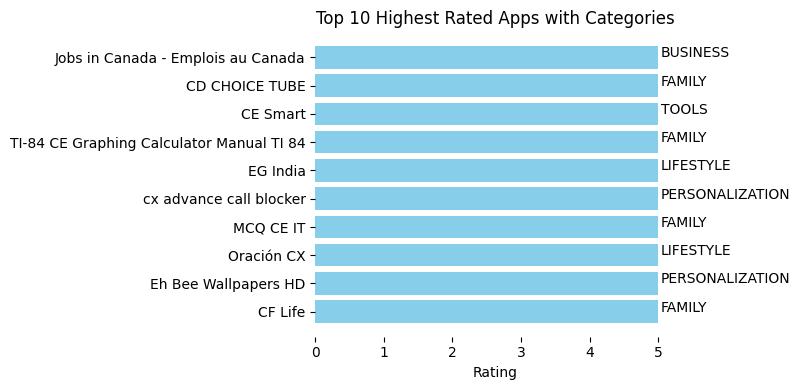

In [23]:
top_10_rated_apps = apps_data.sort_values(by='Rating', ascending=False).head(10)
# Plot
plt.figure(figsize=(8, 4))
bars = plt.barh(top_10_rated_apps['App'], top_10_rated_apps['Rating'], color='skyblue')

# Adding category names to the plot
for bar, category in zip(bars, top_10_rated_apps['Category']):
    plt.text(bar.get_width() + 0.04, bar.get_y() + bar.get_height()/2, category)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.xlabel('Rating')
plt.title('Top 10 Highest Rated Apps with Categories')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating on top
plt.tight_layout()
plt.show()

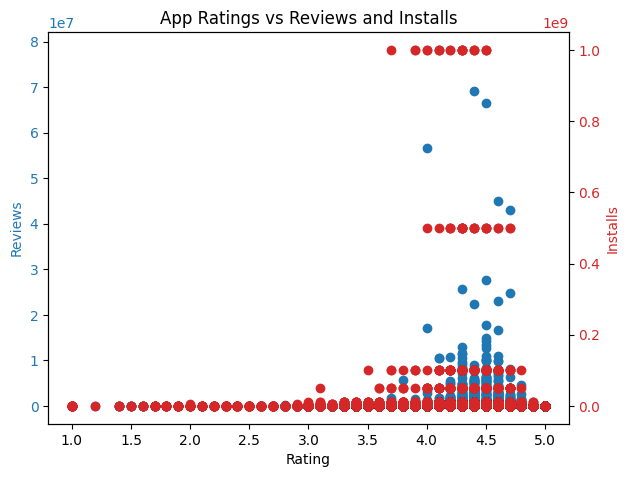

In [24]:
fig, ax1 = plt.subplots()

# Plotting Rating vs Reviews
color = 'tab:blue'
ax1.set_xlabel('Rating')
ax1.set_ylabel('Reviews', color=color)
ax1.scatter(apps_data['Rating'], apps_data['Reviews'], color=color, label='Reviews')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for installs
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Installs', color=color)
ax2.scatter(apps_data['Rating'], apps_data['Installs'], color=color, label='Installs')
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
fig.tight_layout()
plt.title('App Ratings vs Reviews and Installs')
plt.show()

Ratings of 4 to 4.5 have more installs and reviews, than for low ratings.

4)What is the relationship between the number of reviews and app ratings?

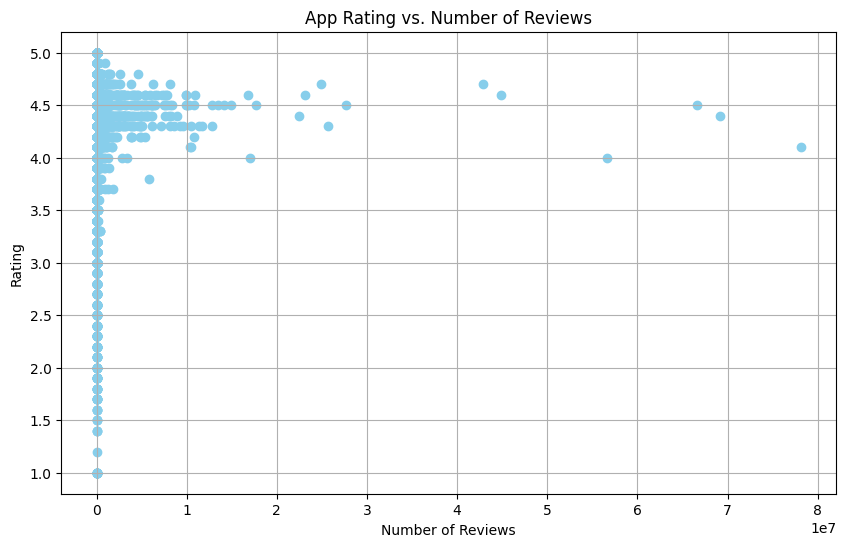

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(apps_data['Reviews'], apps_data['Rating'], color='skyblue')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('App Rating vs. Number of Reviews')
plt.grid(True)
plt.show()

High rated apps have more reviews than that low low ratings.

In [26]:
5)How are app updates distributed throughout the year?

Object `year` not found.


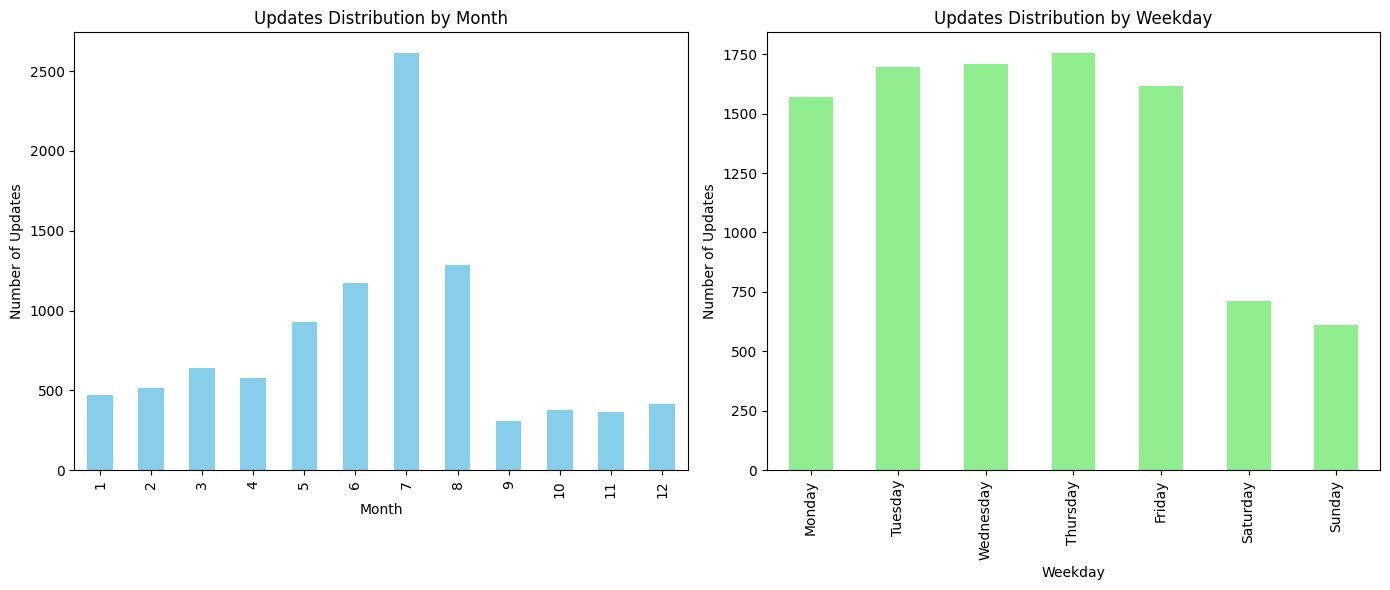

In [27]:
# Convert 'Last Updated' to datetime
apps_data['Last Updated'] = pd.to_datetime(apps_data['Last Updated'])

# Extract month and weekday
apps_data['Month'] = apps_data['Last Updated'].dt.month
apps_data['Weekday'] = apps_data['Last Updated'].dt.day_name()

# Plot updates distribution by month
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
apps_data['Month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Updates')
plt.title('Updates Distribution by Month')

# Plot updates distribution by weekday
plt.subplot(1, 2, 2)
apps_data['Weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='lightgreen')
plt.xlabel('Weekday')
plt.ylabel('Number of Updates')
plt.title('Updates Distribution by Weekday')

plt.tight_layout()
plt.show()

July has the highest number of updates, and certain weekdays also show a higher frequency of updates.

6) How does the app size impact ratings?

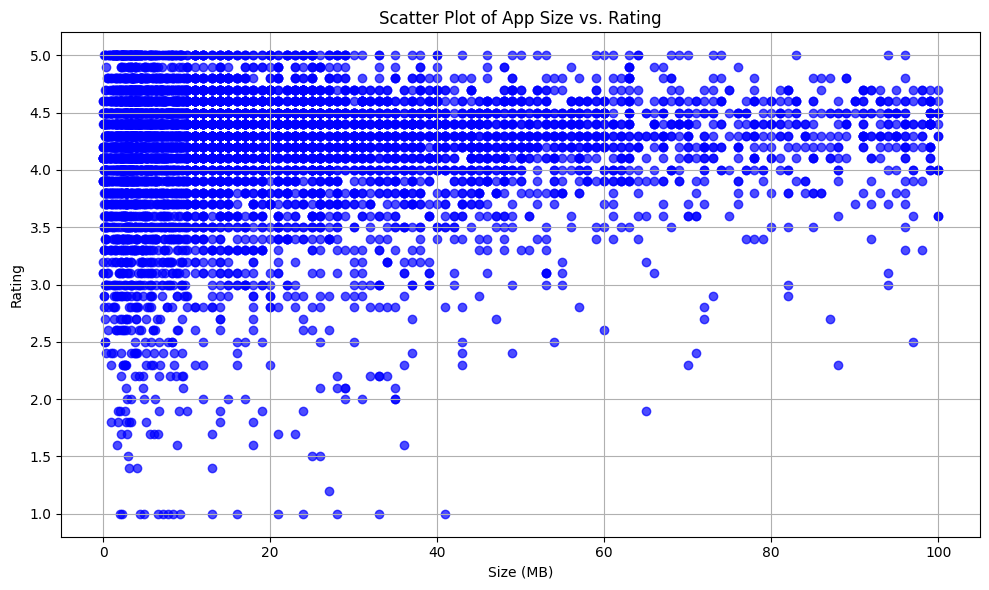

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(apps_data['Size'], apps_data['Rating'], color='blue', alpha=0.7)
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.title('Scatter Plot of App Size vs. Rating')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

Smaller app sizes tend to receive better ratings

Sentiment Analysis

7)How does sentiment polarity vary between paid and free apps?

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

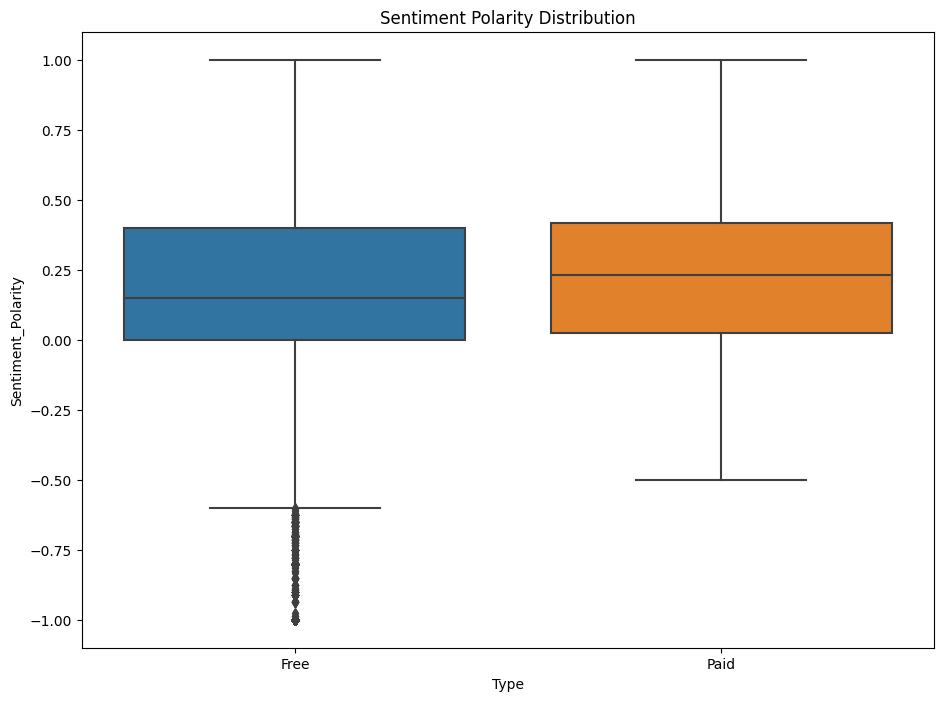

In [29]:
#merging 2 tables
merged_df = pd.merge(apps_data, reviews_data, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])


fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')


Analysis of sentiment polarity scores from user reviews reveals that free apps tend to receive a higher volume of harsh feedback,
as evidenced by significant outliers on the negative side of the spectrum. Conversely, paid apps generally avoid extremely negative reviews. 
This trend suggests that, on average, paid apps might offer higher quality than free apps. Additionally, the median sentiment score for paid apps 
    is slightly higher than that for free apps, reinforcing this observation

8)What percentage of reviews fall into different sentiment categories (positive, neutral, negative)?

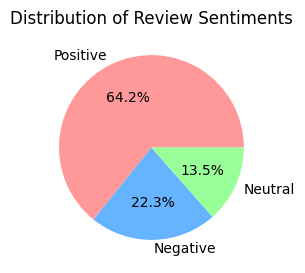

In [31]:

# Drop rows where sentiment is NaN
merged_df = merged_df .dropna(subset=['Sentiment'])

# Calculate the percentage of each sentiment category
sentiment_counts = merged_df ['Sentiment'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(6, 3))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Review Sentiments')
plt.show()

64.2% Positive reviews for the apps,22.3% negative reviews and 13.5% of neutral reviews by customers.

Insights and recommendation

1)Focus on Free Apps
Most apps are free. Developing free apps can attract a larger customer base.
    
2)Size Constraints for Paid Apps
If creating paid apps, keep the size under 40 MB.

3)App Categories to Explore
Underexplored Categories: Events, Beauty, Parenting.
These categories have potential due to their popularity and relatively fewer apps.
    
4)Popular Categories 
Game: High number of installs.
Category with Highest Average Installs: Communication.
Family: Competitive but requires careful development due to negative reviews.

5)Regular Updates
To retain users, apps should be updated regularly.
    
6)Content Accessibility
Develop apps with content that is accessible to a broad audience.

7)Bulkier Apps
Larger apps are more suitable for categories like Games and Family.

